#### Problem Statement

### Make a Machine Learning model to predict the price of a house that to be sold

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [30]:
df=pd.read_csv('housing.csv')

#### EDA

In [31]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [33]:
df['Price'].nunique()

5000

In [34]:
df['Price'][0]

1059033.5578701235

<AxesSubplot:>

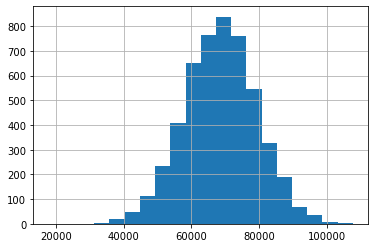

In [35]:
df['Avg. Area Income'].hist(bins=20)

<AxesSubplot:>

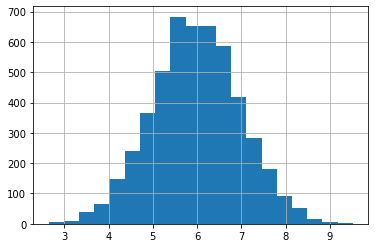

In [36]:
df['Avg. Area House Age'].hist(bins=20)

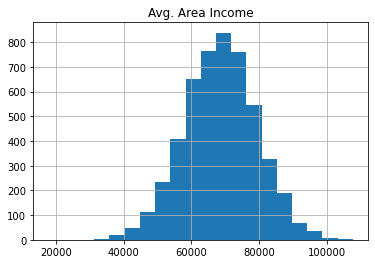

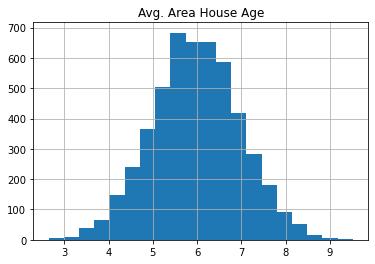

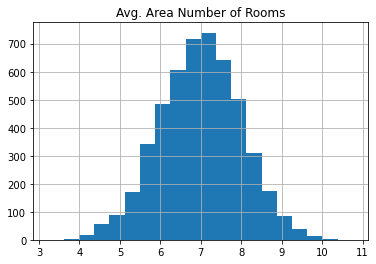

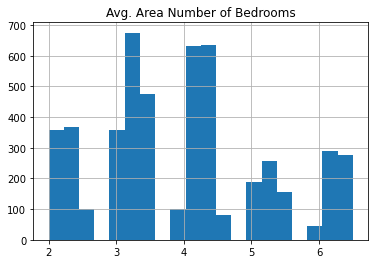

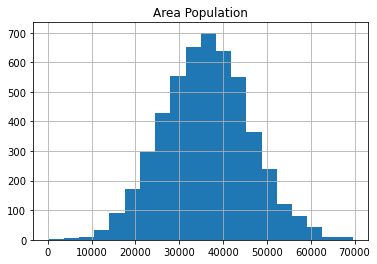

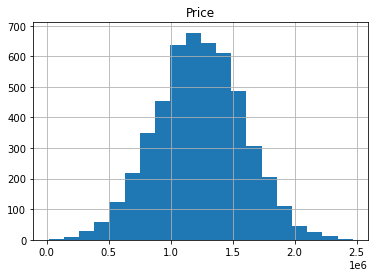

In [37]:
for i in df.columns[:-1]:
    df[i].hist(bins=20)
    plt.title(i)
    plt.show()

In [38]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

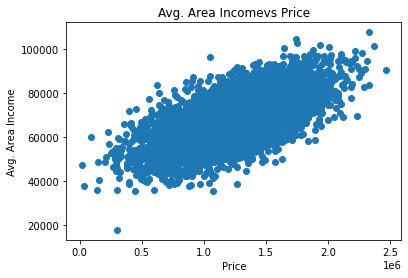

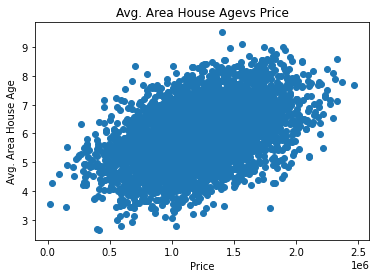

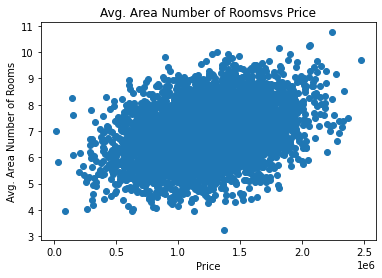

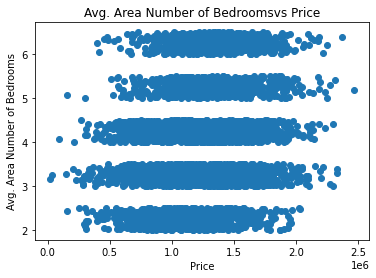

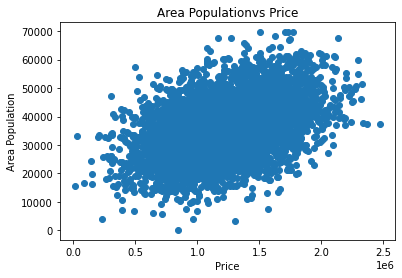

In [39]:
for i in df.columns[:-2]:
    plt.scatter(df['Price'],df[i])
    plt.xlabel('Price')
    plt.ylabel(i)
    plt.title(i+ 'vs Price')
    plt.show()

In [40]:
import seaborn as sns

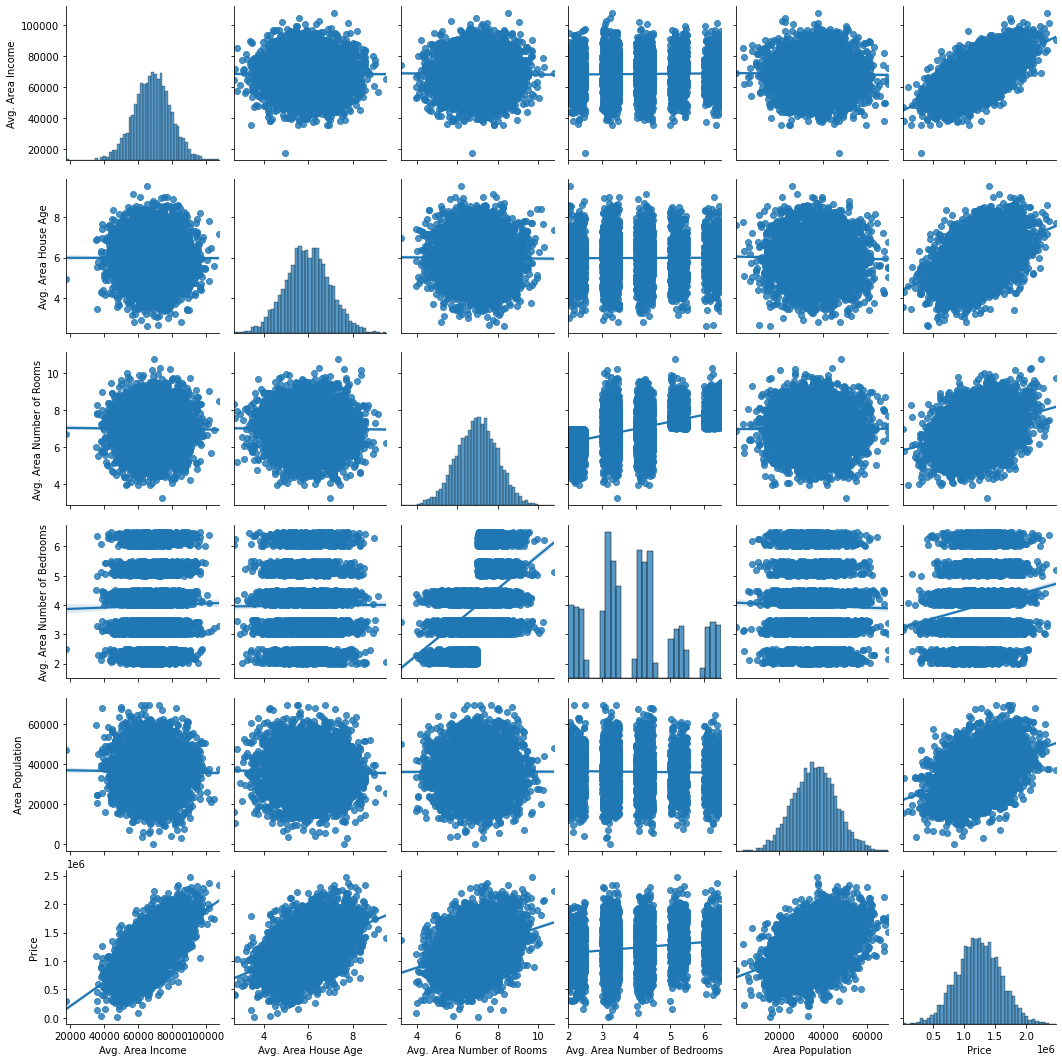

In [41]:
sns.pairplot(df,  kind='reg')

In [44]:
df['Address'][0]

'208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101'

In [45]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [49]:
x=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']]
y=df['Price']

In [50]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Avg. Area Income           5000 non-null   float64
 1   Avg. Area House Age        5000 non-null   float64
 2   Avg. Area Number of Rooms  5000 non-null   float64
 3   Area Population            5000 non-null   float64
dtypes: float64(4)
memory usage: 156.4 KB


In [51]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

### 1. Splitting the Data

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.25,random_state=10)

In [56]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750 entries, 4875 to 1289
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Avg. Area Income           3750 non-null   float64
 1   Avg. Area House Age        3750 non-null   float64
 2   Avg. Area Number of Rooms  3750 non-null   float64
 3   Area Population            3750 non-null   float64
dtypes: float64(4)
memory usage: 146.5 KB


In [57]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 245 to 1234
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Avg. Area Income           1250 non-null   float64
 1   Avg. Area House Age        1250 non-null   float64
 2   Avg. Area Number of Rooms  1250 non-null   float64
 3   Area Population            1250 non-null   float64
dtypes: float64(4)
memory usage: 48.8 KB


In [59]:
ytrain.shape

(3750,)

In [60]:
ytest.shape

(1250,)

In [61]:
xtrain.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
4875,58676.411529,5.978277,5.666757,56269.462943
2773,59046.444231,6.670060,7.335985,37813.714630
4391,50703.152916,6.096813,7.784818,26324.207865
3433,79263.554759,5.185727,6.066881,36164.655454
3764,55593.079806,7.920282,7.976184,42067.693935


### 2.Creating the Machine Learning Model

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
model=LinearRegression()

### 3.Training the model with Training Data

In [71]:
model.fit(xtrain,ytrain)

LinearRegression()

In [66]:
model.coef_

array([2.15919468e+01, 1.65128318e+05, 1.20463708e+05, 1.53368278e+01])

In [72]:
pd.DataFrame(model.coef_,columns=['Coef.'],index=x.columns)

,Coef.
Avg. Area Income,21.591947
Avg. Area House Age,165128.317665
Avg. Area Number of Rooms,120463.708087
Area Population,15.336828


### 4.Evalution

In [76]:
print('%.1f%%'%(model.score(xtest,ytest)*100))

91.8%


In [77]:
ypred=model.predict(xtest)

In [79]:
ypred

array([1193899.36335096, 1187262.43784591, 1046347.43872966, ...,
        769979.21424061, 1588323.12890354, 1732539.85447396])

In [80]:
ytest

245     1.118048e+06
4493    1.326947e+06
4583    1.053485e+06
2242    7.590447e+05
3407    1.381118e+06
            ...     
4274    1.779858e+06
2551    1.404541e+06
2476    9.143783e+05
3711    1.479296e+06
1234    1.747245e+06
Name: Price, Length: 1250, dtype: float64

In [82]:
from sklearn.metrics import mean_absolute_error

In [83]:
print(mean_absolute_error(ytest,ypred))

80728.01465732267


In [84]:
ypred[0]

1193899.3633509632

In [85]:
100*mean_absolute_error(ytest,ypred)/ypred[0]

6.761710168832007

In [86]:
# accuracy =1- error
# error= 1- accuracy

#### Conclusion: Lets use this model,because the accuracy score is more than 90%

### 5.Deployment

In [87]:
final_model=model

In [90]:
pd.to_pickle(final_model,'HousePricePredictor')